# Development of video using Matplotlib


In [1]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from numpy.fft import fft, ifft
from scipy.signal import convolve2d

## Generates a XZ field and show plots for each z

In [2]:
# Initial parameters
x0 = np.linspace(-300 * um, 300 * um, 512)
z0 = np.linspace(-0.125 * um, 800 * um, 1024)
wavelength = 0.6238 * um * 10

# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1)

In [3]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)

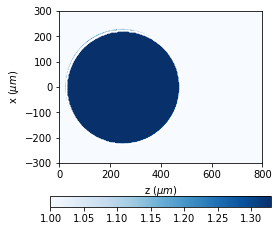

In [4]:
# insert sphere
u1.sphere(r0=(0, 250 * um),
          radius=(225 * um, 225 * um),
          refraction_index=1.33,
          angle=0)
u1.draw_refraction_index(scale='scaled', colorbar_kind='horizontal')


In [5]:
# propagation
u1.WPM(verbose=False, has_edges=True)

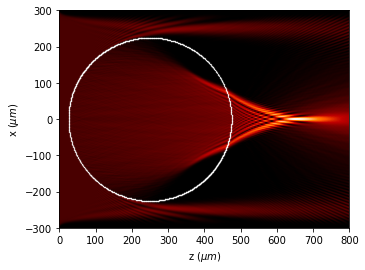

In [6]:
u1.draw(logarithm=True, scale='scaled', draw_borders=True)


In [7]:
seconds = 1.
u1.video(kind='intensity',
         logarithm=True,
         normalize=False,
         time_video=10 * seconds,
         frames_reduction=5,
         filename='creating_video.mp4',
         dpi=100)


In [9]:
%%HTML
<div align="middle">
<video width="100%" controls>
      <source src="creating_video.mp4" type="video/mp4">
</video></div>